<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















**Tomás Gómez Zuleta c.c 1038866012**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Cargar el dataset
df = sns.load_dataset('penguins')

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

**Respuesta:**
Hay tres especies de Pingüinos, Adelie, Chinstrap y Gentoo. Para todos los pingüinos se brindan las siguientes caracteristicas: el tipo de especie, isla donde habita, el tamaño del pico, la profundidad del pico, el tamaño del ala, la masa y su sexo.

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

**Respuesta**
Simplemente se empleará _dropna()_ de pandas para eliminar aquellos datos vacíos que se representan por NaN

3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
**Respuesta**

_Nota:_ Se emplea para el resto de las preguntas el DataFrame limpio.

Se agrupa el DataFrame a partir de la categoría de _Island_ y se cuenta cuantos elementos hay. En este caso se determino que hay 163 pingüinos en la isla Biscoe siendo el mayor valor.

Hay un desbalance si se considera que en la isla de Torgersen solo hay 47 pingüinos en comparación de los 123 y 163 de las otras islas.  

4. Repita la pregunta anterior observando las especies.

**Respuesta**

Se agrupa el DataFrame a partir de la categoría _species_ y se cuenta cuantos elementos hay. En este caso se determino que hay 146 pingüinos de la especie Adelie, siendo el mayor valor.

Hay un desbalance considerando que solo hay 68 pingüinos de la especie Chinstrap, en comparación de las 119 y 146 pingüinos de las otras especies.

In [2]:
#### Primera aproximación de forma general ####

#### 1) Especies distintas de pingüinos

especie = df.species.unique()
copia = df.copy()

especie


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [3]:

#### 2) Limpieza.

cols = df.columns # Nombre de las columnas.

vacios = df.isnull() ### Esto brinda el data frame con una variable booleana que indica True donde se encuentra Nan y False donde no.

limp = df.dropna() ### Eliminar aquellas posiciones vacías.

limp




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
### 3) Isla con mayor número de pingüinos

cant = limp.groupby(cols[1]).count()

cant

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


In [5]:
### 4) Especie con el mayor número de pingüinos

ping_cant = limp.groupby(cols[0]).count()

ping_cant

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

**Respuesta**
La media es 43.99 (mm) con desviación estandar 5.46 (mm)

6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?
**Respuesta**
El pingüino con el pico más largo es de la especie Gentoo con longitud de 59.6 mm

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
**Respuesta**
La masa se analiza para saber la cantidad de pingüinos(separado por especie y juntos) tiene cierta cantidad de masa.
8. Describa la distribucion con ayuda de la media, desviacion estandard
**Respuesta**
La media de la masa de los pingüinos es: 4207.1 (g) con una desviación estandar de 804.0 (g)
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?
**Respuesta**
* La masa en promedio de los machos es: 4545.7 (g) con desviación estandar: 785.3 (g).
* La masa en promedio de las hembras es: 3862.3 (g) con desviación estandar: 664.2 (g)
* La diferencia de la masa media de los pingüinos entre machos y hembras es: 683.41 (g) con desviación estandar: 121.1 (g)

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
**Respuesta**
* El tamaño de la aleta para la especie Adelie es: 190.1 (mm) con desviación estandar: 6.5 (mm)
* El tamaño de la aleta para la especie Chinstrap es: 195.8 (mm) con desviación estandar: 7.08 (mm)
* El tamaño de la aleta para la especie Gentoo es: 217.2 (mm) con desviación estandar: 6.56 (mm)

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?
**Respuesta**
* La longitud mínima de la aleta es: 172.0 (mm)
* La longitud máxima de la aleta es: 231.0 (mm)
12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [6]:
#### Tendencias y visualización de las variables.

### 5) Longitud media y desvación estandar del tamaño de pico.

pico = limp.bill_length_mm ## Obtener la serie de los tamaños del pico

print( f" El tamaño medio del pico es: {np.mean(pico):.4} (mm) con desviación estandar: {np.std(pico):.4} (mm)")

 El tamaño medio del pico es: 43.99 (mm) con desviación estandar: 5.46 (mm)


In [7]:
### 6) Pingüino con el pico de mayor longitud y su especie.

max = np.max(pico)

### Mascara creada para determinar aquella posición del maximo

pos_max = pico.where(pico == max).notnull()

### Aplicando la mascara para determinar la posición

ind_max = pico[pos_max].index

### Fila con el indice

limp.loc[ind_max]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


In [8]:
### 7) Distribución de la masa corporal entre las especies de los pinguinos.

interest = ["species","body_mass_g"]

spec_mass = limp.loc[:,interest] ### Obtener un dataframe asociado a las especies y la masa.

#### Masa por especie:

### Distribución de masa

masas = spec_mass.body_mass_g.unique()

mass_dist = list(map(float,masas)) ### Conviritiendo a un dato tipo flotante
mass_dist.sort()

Mask = list()
mass = list()

for i in range(len(especie)):
  Mask.append(spec_mass.species == especie[i])
  mass.append(spec_mass.body_mass_g[Mask[i]])

In [9]:
def cant(x,mass_dist):
  """
  Esta función brinda una lista con el número de elementos por cada
  mascara.

  """
  data = list()
  for i in range(len(mass_dist)):
    mask = x == mass_dist[i]
    datos = x[mask]
    data.append(len(datos))
  return data

freq = list()
for i in range(len(especie)):
  freq.append(cant(mass[i],mass_dist))


In [10]:
### Cantidad de pingüinos por masa
se = spec_mass.groupby("body_mass_g").count()
se = se.reset_index()
cantidad = np.zeros(len(se))
for i,j in enumerate(se.species):
  cantidad[i]=j

Text(0.5, 1.0, 'Todos las especies')

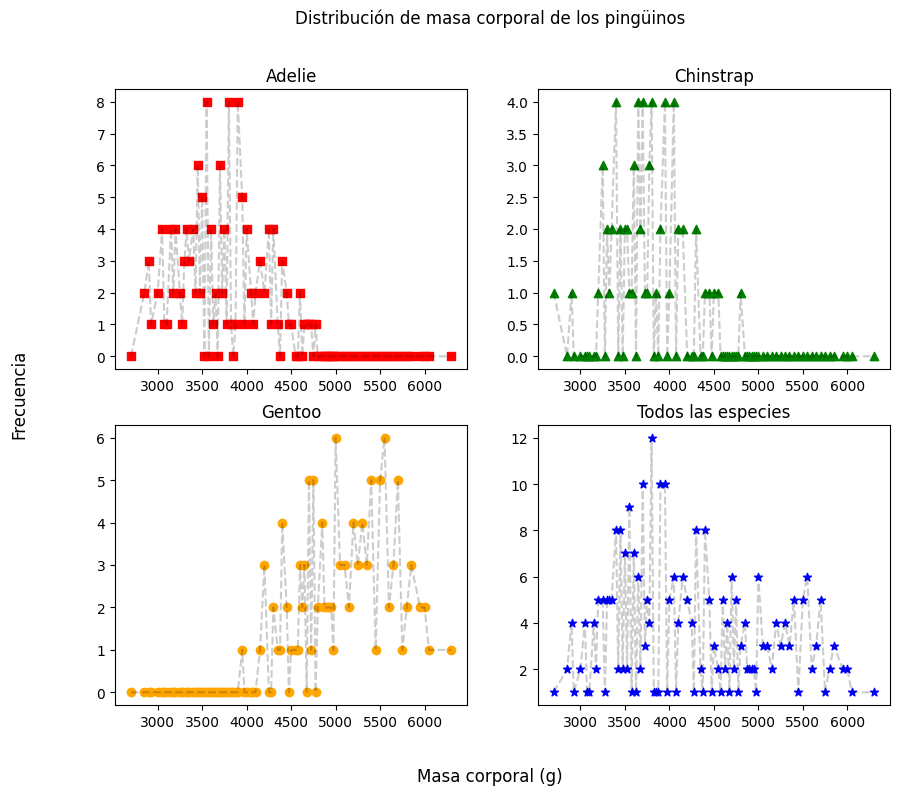

In [11]:
fig,ax = plt.subplots(2,2, figsize = (10,8))
ax[0,0].plot(mass_dist,freq[0], ls = "--", color = "black", alpha = 0.2)
ax[0,0].scatter(mass_dist,freq[0], marker = "s", color = "red")
ax[0,0].set_title(especie[0])

fig.suptitle("Distribución de masa corporal de los pingüinos")

ax[0,1].plot(mass_dist,freq[1], ls = "--", color = "black", alpha = 0.2)
ax[0,1].scatter(mass_dist,freq[1], marker = "^", color = "green")
ax[0,1].set_title(especie[1])

fig.supxlabel("Masa corporal (g)")

ax[1,0].plot(mass_dist,freq[2], ls = "--", color = "black", alpha = 0.2)
ax[1,0].scatter(mass_dist,freq[2], marker = "o", color = "orange")
ax[1,0].set_title(especie[2])

fig.supylabel("Frecuencia")

ax[1,1].plot(mass_dist,cantidad, ls = "--", color = "black", alpha = 0.2)
ax[1,1].scatter(mass_dist,cantidad, marker = "*", color = "blue")
ax[1,1].set_title("Todos las especies")


In [12]:
### 8) Media de la masa y desviación estandar
MASA = limp.body_mass_g

print(f"La media de la masa es: {np.mean(MASA):.5} (g) con desviación estandar: {np.std(MASA):.4} (g)")

La media de la masa es: 4207.1 (g) con desviación estandar: 804.0 (g)


In [13]:
### 9) Diferencia de la media y desviación estandar de la masa para los machos y hembras.

mask_male = limp.sex == "Male"
mask_female = limp.sex == "Female"

index_male = list(map(float,limp.sex[mask_male].index))
index_female = list(map(float,limp.sex[mask_female].index))

print(f"La masa en promedio de los machos es: {np.mean(limp.body_mass_g[index_male]):.5} (g) con desviación estandar: {np.std(limp.body_mass_g[index_male]):.4} (g)")
print(f"La masa en promedio de las hembras es: {np.mean(limp.body_mass_g[index_female]):.5} (g) con desviación estandar: {np.std(limp.body_mass_g[index_female]):.4} (g)")
print(f"La diferencia de la masa media de los pingüinos entre machos y hembras es: {np.mean(limp.body_mass_g[index_male]) - np.mean(limp.body_mass_g[index_female]):.5} (g) con desviación estandar: {np.std(limp.body_mass_g[index_male]) -np.std(limp.body_mass_g[index_female]):.4} (g)")

La masa en promedio de los machos es: 4545.7 (g) con desviación estandar: 785.3 (g)
La masa en promedio de las hembras es: 3862.3 (g) con desviación estandar: 664.2 (g)
La diferencia de la masa media de los pingüinos entre machos y hembras es: 683.41 (g) con desviación estandar: 121.1 (g)


In [14]:
### 10) Tamaño medio de la aleta de los pingüinos por especie con su desviación estandar

mask_sp1 = limp.species == especie[0]
mask_sp2 = limp.species == especie[1]
mask_sp3 = limp.species == especie[2]

index_sp1 = list(map(float,limp.species[mask_sp1].index))
index_sp2 = list(map(float,limp.species[mask_sp2].index))
index_sp3 = list(map(float,limp.species[mask_sp3].index))

print(f"El tamaño de la aleta para la especie Adelie es: {np.mean(limp.flipper_length_mm[index_sp1]):.4} (mm) con desviación estandar: {np.std(limp.flipper_length_mm[index_sp1]):.3} (mm) ")
print(f"El tamaño de la aleta para la especie Chinstrap es: {np.mean(limp.flipper_length_mm[index_sp2]):.4} (mm) con desviación estandar: {np.std(limp.flipper_length_mm[index_sp2]):.3} (mm) ")
print(f"El tamaño de la aleta para la especie Gentoo es: {np.mean(limp.flipper_length_mm[index_sp3]):.4} (mm) con desviación estandar: {np.std(limp.flipper_length_mm[index_sp3]):.3} (mm) ")

El tamaño de la aleta para la especie Adelie es: 190.1 (mm) con desviación estandar: 6.5 (mm) 
El tamaño de la aleta para la especie Chinstrap es: 195.8 (mm) con desviación estandar: 7.08 (mm) 
El tamaño de la aleta para la especie Gentoo es: 217.2 (mm) con desviación estandar: 6.56 (mm) 


In [15]:
### 11) Longitud minima de la aleta y maxima para las tres especies de pingüinos

length_min = np.min(limp.flipper_length_mm)
length_max = np.max(limp.flipper_length_mm)

print(f"La longitud mínima de la aleta es: {length_min} (mm)")
print(f"La longitud máxima de la aleta es: {length_max} (mm)")

La longitud mínima de la aleta es: 172.0 (mm)
La longitud máxima de la aleta es: 231.0 (mm)


In [16]:
### 12) y 13) Variación de la longitud del pico de los pingüinos por especie y por isla.

#### En este caso el conjunto de datos para el tamaño de los picos es muy variado, así que simplemente se realizará una grafica
#### De como es el tamaño de los picos por especie y por isla. Obteniendo graficos de longitud vs posición en el pandas

islas = limp.island.unique()

#### DataFrames partidos por cada una de las islas.

isla1 = limp[limp.island == islas[0]]
isla2 = limp[limp.island == islas[1]]
isla3 = limp[limp.island == islas[2]]

#### Verifiquemos cuantas especies hay por isla

print(isla1.species.unique())
print(isla2.species.unique())
print(isla3.species.unique())

### Esto permite ver que en el primer caso solo hay una especie, y en los otros dos
### hay dos especies. Así tendriamos un total de cinco graficas.


['Adelie']
['Adelie' 'Gentoo']
['Adelie' 'Chinstrap']


In [17]:
#### Longitud del pico para la isla Torgersen, especie Adelie

picos_isla1 = isla1.bill_length_mm.unique()
picos_isla1 = list(map(float,picos_isla1))
picos_isla1.sort()

### La frecuencia de cada dato
freq_isla1 = cant(isla1.bill_length_mm,picos_isla1)

### Si se imprime la anterior lista vemos que el rango(12.5 mm) de los picos es: (33.5,46) mm, donde cada uno de los elementos de la lista aparece 1 o 2 veces

#### Longitud del pico para la isla Biscoe, especie Adelie

isla2_ade = isla2[isla2.species == "Adelie"]

picos_isla2_ade = isla2_ade.bill_length_mm.unique()
picos_isla2_ade = list(map(float,picos_isla2_ade))
picos_isla2_ade.sort()

freq_isla2_ade = cant(isla2_ade.bill_length_mm,picos_isla2_ade)

### Si se imprime la anterior lista vemos que el rango(11.1 mm) de los picos es: (34.5,45.6) mm, donde cada uno de los elementos de la lista aparece 1 o 2 veces

#### Longitud del pico para la isla Biscoe, especie Gentoo

isla2_gen = isla2[isla2.species == "Gentoo"]

picos_isla2_gen = isla2_gen.bill_length_mm.unique()
picos_isla2_gen = list(map(float,picos_isla2_gen))
picos_isla2_gen.sort()

freq_isla2_gen = cant(isla2_gen.bill_length_mm,picos_isla2_gen)

### Si se imprime la anterior lista vemos que el rango(18.7 mm) de los picos es: (40.9,59.6) mm, donde cada uno de los elementos de la lista aparece 1,2,3 o 4 veces

#### Longitud del pico para la isla Dream, especie Adelie

isla3_ade = isla3[isla3.species == "Adelie"]

picos_isla3_ade = isla3_ade.bill_length_mm.unique()
picos_isla3_ade = list(map(float,picos_isla3_ade))
picos_isla3_ade.sort()

freq_isla3_ade = cant(isla3_ade.bill_length_mm,picos_isla3_ade)

### Si se imprime la anterior lista vemos que el rango(12 mm) de los picos es: (32.1,44.1) mm, donde cada uno de los elementos de la lista aparece 1,2,3 o 4 veces

#### Longitud del pico para la isla Dream, especie Chinstrap

isla3_chi = isla3[isla3.species == "Chinstrap"]

picos_isla3_chi = isla3_chi.bill_length_mm.unique()
picos_isla3_chi = list(map(float,picos_isla3_chi))
picos_isla3_chi.sort()

freq_isla3_chi = cant(isla3_chi.bill_length_mm,picos_isla3_chi)

### Si se imprime la anterior lista vemos que el rango(17.1) de los picos es: (40.9,58) mm, donde cada uno de los elementos de la lista aparece 1,2 o 3 veces

### Se concluye que la especie con el pico más grande es el de la especie Gentoo de la isla Biscoe. Además, en este isla es la que se encuentra
### la mayor variabilidad del tamaño de pico por especie. Pues, la especie Gentoo es la del pico más grande(con un rago de 18.7 mm), mientras que la especie Adelie es una
### de un pico más pequeño, y con un rango de variabilidad inferior (11.1 mm).



## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Text(0.5, 1.0, 'Relación entre la longitud del pico y la masa corporal de los pingüinos')

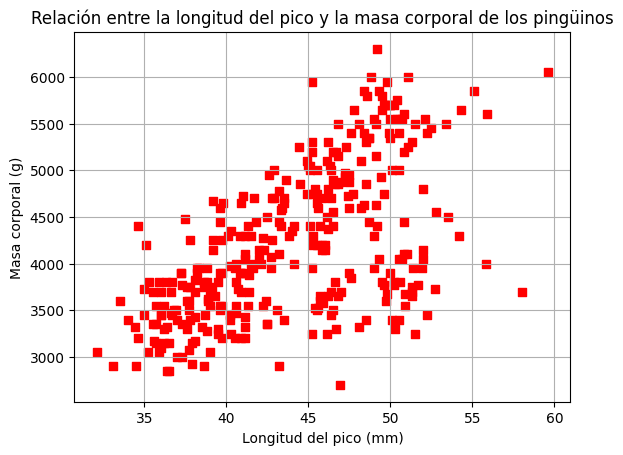

In [18]:
### 14) Relación entre la longitud del pico y la masa corporal de los pingüinos.

### Todos los pingüinos

MassBill = ["bill_length_mm","body_mass_g"]
mass_bill = limp.loc[:,MassBill]

#plt.plot(mass_bill.bill_length_mm,mass_bill.body_mass_g, ls = "--", color = "black", alpha = 0.2)
plt.scatter(mass_bill.bill_length_mm,mass_bill.body_mass_g, marker = "s", color = "red")
plt.xlabel("Longitud del pico (mm)")
plt.grid(True)
plt.ylabel("Masa corporal (g)")
plt.title("Relación entre la longitud del pico y la masa corporal de los pingüinos")

In [19]:
### Delimitando los pingüinos por especie.

mass_bill_sp1 = mass_bill[mask_sp1]

mass_bill_sp2 = mass_bill[mask_sp2]

mass_bill_sp3 = mass_bill[mask_sp3]

especie

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

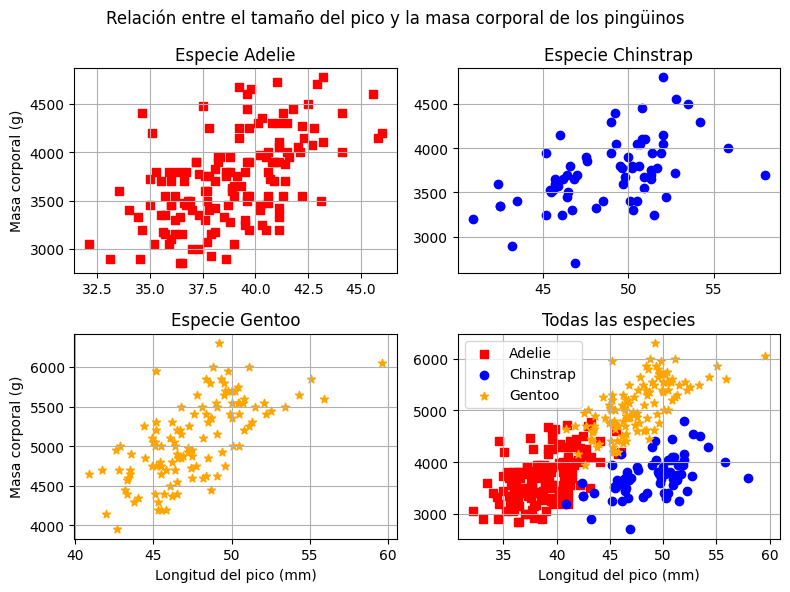

In [20]:
fig, axs = plt.subplots(2,2, figsize = (8,6))
### Entrada (0,0)
axs[0,0].scatter(mass_bill_sp1.bill_length_mm,mass_bill_sp1.body_mass_g, marker = "s", color = "red", label = "Adelie")
axs[0,0].grid(True)
axs[0,0].set_title("Especie Adelie")
axs[0,0].set_ylabel("Masa corporal (g)")

### Entrada (0,1)
axs[0,1].scatter(mass_bill_sp2.bill_length_mm,mass_bill_sp2.body_mass_g, marker = "o", color = "blue", label = "Chinstrap")
axs[0,1].grid(True)
axs[0,1].set_title("Especie Chinstrap")

### Entrada (1,0)
axs[1,0].scatter(mass_bill_sp3.bill_length_mm,mass_bill_sp3.body_mass_g, marker = "*", color = "orange", label = "Gentoo")
axs[1,0].grid(True)
axs[1,0].set_title("Especie Gentoo")
axs[1,0].set_xlabel("Longitud del pico (mm)")
axs[1,0].set_ylabel("Masa corporal (g)")

### Entrada (1,1)
axs[1,1].scatter(mass_bill_sp1.bill_length_mm,mass_bill_sp1.body_mass_g, marker = "s", color = "red", label = "Adelie")
axs[1,1].scatter(mass_bill_sp2.bill_length_mm,mass_bill_sp2.body_mass_g, marker = "o", color = "blue", label = "Chinstrap")
axs[1,1].scatter(mass_bill_sp3.bill_length_mm,mass_bill_sp3.body_mass_g, marker = "*", color = "orange", label = "Gentoo")
axs[1,1].legend()
axs[1,1].grid(True)
axs[1,1].set_title("Todas las especies")
axs[1,1].set_xlabel("Longitud del pico (mm)")

### Parametros de la figura
fig.suptitle("Relación entre el tamaño del pico y la masa corporal de los pingüinos")

plt.tight_layout()


Conclusión: Se observar una especie de relación lineal entre la masa corporal del pingüino y el tamaño del pico. Lo cual era de esperarse, pues entre más pesado el animal se esperaría que tuviera un mayor tamaño y consecuentemente una mayor longitud en su pico. No obstante, este comportamiento parece ser que si cambia un poco para la especie Chinstrap, en vista que los datos se encuentran más dispersos. Pero, no existe envidencia suficiente para descatimar el hecho que sigan un comportamiento lineal.


**15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?**

Para analizar este comportamiento vamos a considerar las siguientes consideraciónes a partir de la estadistica.

**Coeficiente de correlación de Pearson**

El grado de correlación entre dos variables aleatorias $X,Y$ que se suponen que su distribución conjunta es una normal bivariada, se ve determinado por la siguiente ecuación:


\begin{equation}
\rho = \frac{C_{X,Y}}{\sigma_{X}\sigma_{Y}}=\frac{\sum_{i}X_{i}Y_{i}-n\mu_{X}\mu_{Y}}{\sqrt{ (\sum_{i}X_{i}^{2}-n\mu_{X}^{2})(\sum_{i}Y_{i}^{2}-n\mu_{Y}^{2}) } }
\end{equation}


La anterior ecuación puede tomar valores entre $-1<\rho<1$, donde se tiene tres valores importantes. Cuando $\rho = 0$, esto indica que la covarianza es cero, y por lo tanto no hay correlación alguna entre las variables aleatorias $X$ e $Y$. Luego, si $\rho = 1$, tendriamos que las dos variables están perfectamente correlacionadas y ambas crecen en la misma dirección, por el contrario, si $\rho = -1$, tendriamos que las variables están perfectamente correlacionadas, pero crecen en sentidos opuestos. Esto indica que, entre más cerca se encuentre de cero, bien sea por la izquierda o por la derecha habrá una menor correlación, y a medida que se acerque a $\pm 1$, tendríamos que la correlación entre ambas variables es mayor hasta que se tiene el valor "perfecto" límite cuando vale exactamente $\pm 1$.


Nótese que la anterior medida es una medida de la población aquella la podemos estimar mediante el estadigrafo $\hat{r}$, definido del siguiente modo:


\begin{equation}
\hat{r} = \frac{\sum_{i}X_{i}Y_{i} - n \bar{X} \bar{Y} }{(n-1)S_{X}S_{Y}}
\end{equation}


Este estadigrafo tiene una interpretación ligeramente distinta del coeficiente de correlación de Pearson. Exactamente se emplea su valor cuadrático, esto es, se suele emplear $r^{2}$, que se conoce como el coeficiente de determinación. Este coeficiente exactamente lo que mide es el porcentaje de la relación entre ambas variables, es decir, mide el porcentaje de cambio inducido en $X$ o $Y$ debido a que cambió la otra variable.

Donde las barras superiores indican media, y $S_{X}$,$S_{Y}$ representan el estadigrafo de la desviación estandar de cada dato, esto es:

**Desviación estándar, datos independientes**

\begin{equation}
S_{X} = \left(\frac{\sum_{i}^{n}(X_{i}-\bar{X})^{2}}{n-1}\right)^{\frac{1}{2}}
\end{equation}


**Desviación estándar, datos dependientes**

\begin{equation}
S_{Y} = \left(\frac{\sum_{i}^{n}(Y_{i}-\bar{Y})^{2}}{n-1}\right)^{\frac{1}{2}}
\end{equation}

In [21]:
### 15) Correlación significativa.

def r(X,Y):
  n = len(X)
  T1_sup = np.sum(X*Y)
  T2_sup = n* np.mean(X) * np.mean(Y)
  T_inf = (n-1) * np.std(X) * np.std(Y)
  return (T1_sup - T2_sup)/T_inf

### Relación para todos los pingüinos:

r_todos = r(mass_bill.body_mass_g,mass_bill.bill_length_mm)

### Relación para las especies:

r_ade = r(mass_bill_sp1.bill_length_mm,mass_bill_sp1.body_mass_g)
r_chi = r(mass_bill_sp2.bill_length_mm,mass_bill_sp2.body_mass_g)
r_gen = r(mass_bill_sp3.bill_length_mm,mass_bill_sp3.body_mass_g)

print(f"El coeficiente de determinación para todas las especies es: {r_todos**2:.2} ")
print(f"El coeficiente de determinación para la especie Adelie es: {r_ade**2:.2} ")
print(f"El coeficiente de determinación para la especie Chinstrap es: {r_chi**2:.2} ")
print(f"El coeficiente de determinación para la especie Gentoo es: {r_gen**2:.2} ")

El coeficiente de determinación para todas las especies es: 0.35 
El coeficiente de determinación para la especie Adelie es: 0.3 
El coeficiente de determinación para la especie Chinstrap es: 0.27 
El coeficiente de determinación para la especie Gentoo es: 0.45 


Del anterior analisis estadistico podemos concluir que:
* El coeficiente de determinación para todas las especies es: 0.35
* El coeficiente de determinación para la especie Adelie es: 0.3
* El coeficiente de determinación para la especie Chinstrap es: 0.27
* El coeficiente de determinación para la especie Gentoo es: 0.45

De los anteriores resultados podemos concluir que existe una correlación media-alta entre las variables en general, esto es, para todos los pingüinos no se puede concluir que un incremento apreciable en su masa influye notoriamente en un aumento de la longitud del pico. Exactamente, vemos que dado un cambio de alguna de las dos variables suele tener una influencia en la otra pero no muy alta.

Este coeficiente de determinación cambia para cada especie, teniendo un valor similar para la especie de Adelie y Chinstrap, pero para la especie Gentoo su valor es mayor. En esta última la influencia empieza a ser más considerable al tener un valor cercano a 0.5. En el cual, un 45% de variación de algunas de las variables es explicada por la otra. Cabe señalar que no se sabe con certeza que variable causa la otra.

In [106]:
 ### 16) Relación entre el sexo y la longitud de la aleta por especie de pingüino.

### DataFrames especie Adelie para Macho y Hembra
esp_ade_male = limp[mask_sp1 & mask_male]
esp_ade_female = limp[mask_sp1 & mask_female]
### DataFrames especie Chinstrap para macho y hembra
esp_chin = limp[mask_sp2 & mask_male]
esp_chin_female = limp[mask_sp2 & mask_female]
### DataFrames especie Gentoo para macho y hembra
esp_gen = limp[mask_sp3 & mask_male]
esp_gen_female = limp[mask_sp3 & mask_female]

aletas = limp.flipper_length_mm.unique()
aletas = list(map(float,aletas))
aletas.sort()

### Frecuancias de ocurrencia para cada una de las especies.
### Esto ultimo para determinar la distribución
freq_ade_male = cant(esp_ade_male.flipper_length_mm,aletas)
freq_ade_female = cant(esp_ade_female.flipper_length_mm,aletas)
freq_chin_male = cant(esp_chin.flipper_length_mm,aletas)
freq_chin_female = cant(esp_chin_female.flipper_length_mm,aletas)
freq_gen_male = cant(esp_gen.flipper_length_mm,aletas)
freq_gen_female = cant(esp_gen_female.flipper_length_mm,aletas)
freq_todos_male = cant(limp[mask_male].flipper_length_mm,aletas)
freq_todos_female = cant(limp[mask_female].flipper_length_mm,aletas)

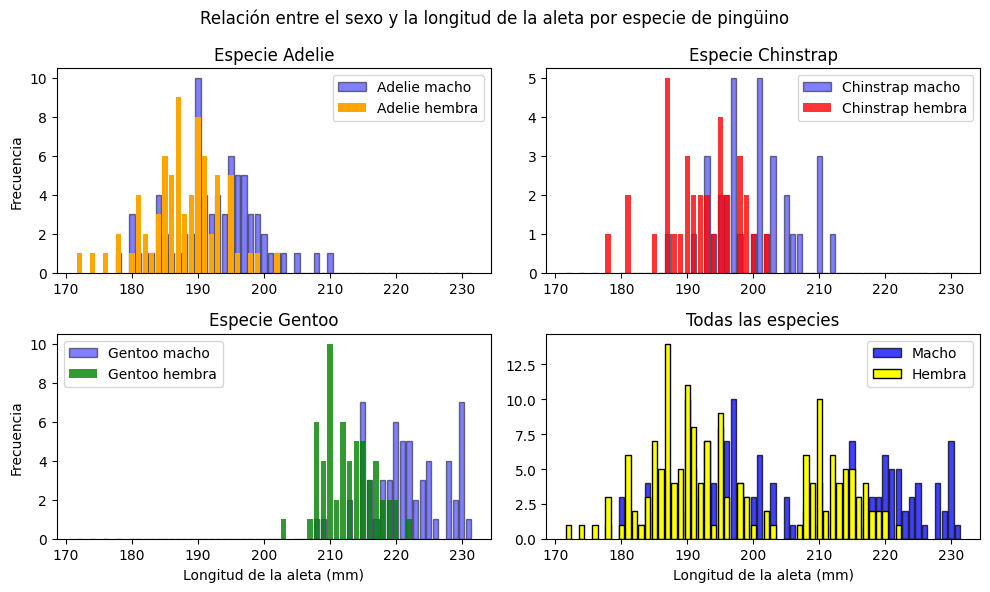

In [111]:
fig, ax_ = plt.subplots(2,2,figsize = (10,6))
ax_[0,0].bar(aletas,freq_ade_male, label = "Adelie macho", edgecolor = "black", color = "blue", alpha = 0.5)
ax_[0,0].bar(aletas,freq_ade_female, label = "Adelie hembra", color = "orange")
ax_[0,0].legend()
ax_[0,0].set_title("Especie Adelie")
ax_[0,0].set_ylabel("Frecuencia")

fig.suptitle("Relación entre el sexo y la longitud de la aleta por especie de pingüino")

ax_[0,1].bar(aletas,freq_chin_male, label = "Chinstrap macho", edgecolor = "black", color = "blue", alpha = 0.5)
ax_[0,1].bar(aletas,freq_chin_female, label = "Chinstrap hembra", color = "red", alpha = 0.8)
ax_[0,1].legend()
ax_[0,1].set_title("Especie Chinstrap")

ax_[1,0].bar(aletas,freq_gen_male, label = "Gentoo macho", edgecolor = "black", color = "blue", alpha = 0.5)
ax_[1,0].bar(aletas,freq_gen_female, label = "Gentoo hembra", color = "green",alpha = 0.8)
ax_[1,0].legend()
ax_[1,0].set_title("Especie Gentoo")
ax_[1,0].set_xlabel("Longitud de la aleta (mm)")
ax_[1,0].set_ylabel("Frecuencia")

ax_[1,1].bar(aletas,freq_todos_male, label = "Macho", edgecolor = "black", color = "blue", alpha = 0.75)
ax_[1,1].bar(aletas,freq_todos_female, label = "Hembra", color = "yellow",edgecolor = "black")
ax_[1,1].legend()
ax_[1,1].set_title("Todas las especies")
ax_[1,1].set_xlabel("Longitud de la aleta (mm)")

plt.tight_layout()

Dada las anteriores distribuciónes no normalizadas de la longitud de la aleta por especie y por sexo, observamos que en general para todas las especies las hembras suelen tener una longitud de aleta más pequeña.
Para poder verificar está aseveración se debería realizar una prueba de hipotesis respecto sí la medía de la longitud de la aleta para las hembras es menor que la de los machos para cada especie y todos en general.
Al tener un conjunto de datos superior a 30 estás distribuciónes se podrían aproximar como si fueran normales.

## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Dado el desarrollo del punto (15) este será el que verificaré una correlación entre las variables con la siguiente prueba de hipotesis:

## Prueba de correlación.

\begin{equation}
H :=
\begin{cases}
H_{o}: \rho  = 0 \\
H_{a}: \rho \neq 0
\end{cases}
\end{equation}

En esta prueba de hipotesis queremos verificar si existe correlación entre las variables $X:=$ Longitud del pico y $Y:=$ Masa corporal. Para ello empleamos el siguiente estadigrafo insesgado:

\begin{equation}
t = \frac{r \sqrt{n-2} }{\sqrt{1-r^{2}}}
\end{equation}

Donde esto corresponde a una prueba de dos colas. Teniendo en cuenta que r sigue una distribución t-student con n-2 grados de libertad podemos definir las siguientes regiones de rechazo y de aprobación de la hipotesis nula (considerando una confiabilidad $\alpha$ que en nuestro caso será $\alpha$= 0.05).

\begin{equation}
R :=
\begin{cases}
Ra: -t_{1-\alpha/2,\nu }\leq t \leq t_{1-\alpha/2,\nu} \\
Rr : t> t_{1-\alpha/2,\nu}\\
Rr : t< -t_{1-\alpha/2,\nu}
\end{cases}
\end{equation}

En nuestro caso particular(para todos los pingüinos) tendriamos que $\nu = 331$, así que $t_{1-\alpha /2}=1.967$, indicando una región:


\begin{equation}
R :=
\begin{cases}
Ra: -1.967\leq t \leq 1.967 \\
Rr : t> 1.967\\
Rr : t< -1.967
\end{cases}
\end{equation}

Finalmente, se empleará  un intervalo de confianza que me permitirá saber con una certeza de $(1-\alpha)$ el intervalo donde se encuentra el valor poblaciónal $\rho$(esto es lo que efectivamente me permitirá saber si la correlación es explicada por la aleatoriedad o no).

Para ello consideremos la variable auxiliar $Z_{r}$ la cual sigue una distribución aproximadamente normal, definida por:

\begin{equation}
Z_{r}=\frac{1}{2}ln\left(\frac{1+r}{1-r}\right)
\end{equation}

Con una desviación estandar $\sigma_{Z_{r}}=\frac{1}{\sqrt{n-3}}$. Así el intervalo de confianza viene dado por:

\begin{equation}
P(   Z_{r} - Z_{1-\alpha/2} \frac{1}{\sqrt{n-3}}    <Z_{\rho}< Z_{r} + Z_{1-\alpha/2} \frac{1}{\sqrt{n-3}}     )=1-\alpha
\end{equation}

Notese que estos valores están dados para la variable aleatoria $Z_{\rho}$, pero los requerimos para el parametro poblacional $\rho$, así se emplea la tabla A-12 del libro Marques para determinar a partir del anterior intervalo de confianza cuanto será el valor de $\rho$.

Esta relación general se va a emplear para cada especie de pingüino, pero no se escribirá explicitamente sus valores.

In [127]:
def estad_t(X,Y):
  n = len(X)
  r_ = r(X,Y)
  t = (r_ * np.sqrt(n-2))/np.sqrt(1-r_**2)
  return t

def Z_r(r):
  T1 = 1+r
  T2 = 1-r
  return (1/2)*np.log(T1/T2)

In [147]:
#### Prueba de hipotesis para la especie Adelie
### En este caso los grados de libertad son 144 y una confiabilidad
### \alpha = 0.5, entonces: t_{1-\alpha/2} = 1.976

t_ade = estad_t(mass_bill_sp1.bill_length_mm,mass_bill_sp1.body_mass_g)

Z_ade = Z_r(r_ade)

Z_1 = 1.96 ### Este valor es el mismo para todos los intervalos de confianza

sigma_r_ade = 1 / np.sqrt(len(mass_bill_sp1)-3)

print(f"El estadigrafo t para la especie Adelie tiene un valor de: {t_ade:.2}")

#### Como t=7.9 > 1.976 se rechaza la hipotesis nula y se acepta la hipotesis alternativa, por lo tanto
#### la longitud del pico y la masa corporal de los pingüinos de la especie Adelie si estan correlacionados.
#### Ahora veamos el intervalo de confianza para saber si aquella correlación es debida a la aleatoriedad.
#### I.C = Intervalo de confianza

print(f"Para la variable Z el I.C de la especie Adelie es: ({Z_ade-Z_1*sigma_r_ade:.3}<Z<{Z_ade+Z_1*sigma_r_ade:.3})")
print("Para la variable rho el I.C de la especie Adelie es: (0.424<rho<0.652)")

#### Conclusión: Con una confiabilidad de 0.05 podemos decir que la variable rho se encuentra alejada del valor cero, entonces
#### hay una correlación lineal entre las v.a X , Y que no es debido a la fluctuación aleatoria de los datos.




El estadigrafo t para la especie Adelie tiene un valor de: 7.9
Para la variable Z el I.C de la especie Adelie es: (0.452<Z<0.779)
Para la variable rho el I.C de la especie Adelie es: (0.424<rho<0.652)


In [154]:
#### Prueba de hipotesis para la especie Chinstrap
### En este caso los grados de libertad son 66 y una confiabilidad
### \alpha = 0.5, entonces: t_{1-\alpha/2} = 1.996

t_chi = estad_t(mass_bill_sp2.bill_length_mm,mass_bill_sp2.body_mass_g)

Z_chi = Z_r(r_chi)

Z_1 = 1.96 ### Este valor es el mismo para todos los intervalos de confianza

sigma_r_chi = 1 / np.sqrt(len(mass_bill_sp2)-3)

print(f"El estadigrafo t para la especie Chinstrap tiene un valor de: {t_chi:.2}")

#### Como t = 5 > 1.996 se rechaza la hipotesis nula y se acepta la hipotesis alternativa, por lo tanto
#### la longitud del pico y la masa corporal de los pingüinos de la especie Chinstrap si estan correlacionados.
#### Ahora veamos el intervalo de confianza para saber si aquella correlación es debida a la aleatoriedad.
#### I.C = Intervalo de confianza

print(f"Para la variable Z el I.C de la especie Chinstrap es: ({Z_chi-Z_1*sigma_r_chi:.3}<Z<{Z_chi+Z_1*sigma_r_chi:.3})")
print("Para la variable rho el I.C de la especie Chinstrap es: (0.324<rho<0.676)")

#### Conclusión: Con una confiabilidad de 0.05 podemos decir que la variable rho se encuentra alejada del valor cero, entonces
#### hay una correlación lineal entre las v.a X , Y que no es debido a la fluctuación aleatoria de los datos.

El estadigrafo t para la especie Chinstrap tiene un valor de: 5.0
Para la variable Z el I.C de la especie Chinstrap es: (0.335<Z<0.821)
Para la variable rho el I.C de la especie Chinstrap es: (0.324<rho<0.676)


In [158]:
#### Prueba de hipotesis para la especie Gentoo
### En este caso los grados de libertad son 117 y una confiabilidad
### \alpha = 0.5, entonces: t_{1-\alpha/2} = 1.980

t_gen = estad_t(mass_bill_sp3.bill_length_mm,mass_bill_sp3.body_mass_g)

Z_gen = Z_r(r_gen)

Z_1 = 1.96 ### Este valor es el mismo para todos los intervalos de confianza

sigma_r_gen = 1 / np.sqrt(len(mass_bill_sp3)-3)

print(f"El estadigrafo t para la especie Gentoo tiene un valor de: {t_gen:.2}")

#### Como t = 9.8 > 1.980 se rechaza la hipotesis nula y se acepta la hipotesis alternativa, por lo tanto
#### la longitud del pico y la masa corporal de los pingüinos de la especie Gentoo si estan correlacionados.
#### Ahora veamos el intervalo de confianza para saber si aquella correlación es debida a la aleatoriedad.
#### I.C = Intervalo de confianza

print(f"Para la variable Z el I.C de la especie Gentoo es: ({Z_gen-Z_1*sigma_r_gen:.3}<Z<{Z_gen+Z_1*sigma_r_gen:.3})")
print("Para la variable rho el I.C de la especie Gentoo es: (0.56<rho<0.76)")

#### Conclusión: Con una confiabilidad de 0.05 podemos decir que la variable rho se encuentra alejada del valor cero, entonces
#### hay una correlación lineal entre las v.a X , Y que no es debido a la fluctuación aleatoria de los datos.
#### En este caso particular como el valor de r^{2} siempre fue mayor, vemos que hay una mayor correlación de los
#### datos
#### Como conclusión los pingüinos de la especie Gentoo tenían un tamaño mayor en todos los aspectos
#### y una mejor correlación entre sus variables aleatorias.

El estadigrafo t para la especie Gentoo tiene un valor de: 9.8
Para la variable Z el I.C de la especie Gentoo es: (0.633<Z<0.997)
Para la variable rho el I.C de la especie Gentoo es: (0.56<rho<0.76)
